# Chap07.3 - 텐서플로 추상화와 간소화, Keras

## 7.4 케라스(Keras)

[**케라스(Keras)**](https://keras.io)는 인기있는 텐서플로 확장 라이브러리 중 하나이다. 케라스는 원래 Theano용으로 개발되었지만, 2017년 구글의 공식 후원을 받아 1.1버전 부터 `tf.contrib.keras`안에 들어왔으며, 현재 이글을 작성하는 시점인 2018.06.30의 1.8버전에는 `tf.keras`로 변경된 텐서플로의 한 부분으로 자리를 잡았다. 따라서, 케라스는 Theano와 텐서플로(TensorFlow) 양쪽을 모두 지원한다.

케라스는 연산 그래프를 다루고 텐서플로와 통신하는 데 사용할 수 있는 자체 그래프 구조를 가지고 있다. 케라스는 순차형([Sequential](https://keras.io/models/sequential))모델과 함수형 API([Funtional API](https://keras.io/models/model)) 두 가지 유형이 있다. 순차형 모델은 간단하게 계층을 쌓아 모델링 할 수 있도록 설계되었고, 함수형 API는 다양한 계층구조를 가진 일반적인 모델을 지원한다.

#### 설치

위에서도 말했듯이, 텐서플로 1.8 버전에서는 케라스를 `tf.keras`로 임포트할 수 있다. 하지만 텐서플로 1.1이전 버전인 경우 케라스를 사용하려면 별도로 설치를 해주어야 한다.

```bash
pip install numpy scipy yaml keras
```

여기서는 별도로 케라스를 설치하지 않고 텐서플로 안에 있는 `tf.keras`로 임포트하여 모델을 구현해본다.

### 7.4.1 순차형(Sequential) 모델

케라스의 순차형 모델은 정의한 다음 아래의 예제 코드처럼 차례로 계층(layer)을 쌓아 나가면 되는 매우 간단한 구조이다. 

#### 1) Sequential 모델 생성

```python
# example
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Activation

model = Sequential()
model.add(Dense(units=64, input_dim=784))
model.add(Activation('softmax')
```

위의 코드는 다음과 같이 쓸 수도 있다.

```python
# example
model = Sequential([
    Dense(64, input_shape=(784,), activation='softmax')])
```

위의 코드에서 **Dense** 계층은 완전연결계층(fully-connected layer)을 의미한다. 

#### 2) Compilation

Sequential 모델을 정의하고 학습하기 전에 `.compile()` 메서드를 사용하여 학습에 대한 설정을 해줘야한다. 설정에 필요한 3개의 인자가 있는데 다음과 같다.

- **Optimizer**: 최적화 함수를 설정하는 부분이며, `'sgd', 'adam', 'rmsprop'` 등 문자열타입으로 설정할 수 있다.
- **Loss function**: 손실함수를 설정해주는 부분이며, `'categorical_crossentropy', 'mse'` 처럼 문자열타입으로 설정할 수 있다..
- **Metrics**: 모델의 성능을 판정하는데 사용하는 지표 함수이며,`['accuracy']` 처럼 리스트 형태로 설정한다.

```python
# example - compile
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

위의 예제에서 `optimizer=` 인자에 `tf.keras.optimizers`를 사용하면 아래와 같이 더욱 정교한 최적화 함수를 설정할 수 있다.

```python
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.02, momentum=0.8, nesterov=True),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

#### 3) Training

마지막으로 학습을 하기위해 `.fit()`에 학습할 데이터를 넣어주고, 에폭(`epochs`)과 배치크기(`batch_size`)를 설정해준다. [Chap07.1 - Estimator](http://excelsior-cjh.tistory.com/157)와 [Chapter07.2 - TFLearn](http://excelsior-cjh.tistory.com/158)에서 살펴본 `tf.estimator`와 `TFLearn`과 마찬가지로 모델에 대한 평가(`.evaluate()`) 및 예측(`.predict()`)을 제공한다.

```python
from tensorflow.python.keras.callbacks import TensorBoard, EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', min_delta=0,
                           patience=10, verbose=0, mode='auto')
model.fit(x_train, y_train, epochs=10, batch_size=64,
          callbacks=[TensorBoard(log_dir='./models/autoencoder'),
                     early_stop])
```

위의 예제 코드에서 `.fit()`의 인자 중 `callbacks`는 학습 단계에서 적용되는 함수이며, 학습에 대한 통계를 구하거나, 동적으로 학습 결정을 할 수 있게 해주는 인자이다. 예제 코드에서는 `TensorBoard()` 함수와 `EarlyStopping()`을 콜백에 넣어주었다. `EarlyStopping()`은 **조기종료**로 해석할 수 있으며, 모델이 학습데이터에 완전히 적합되어 오버피팅 되는것을 방지할때 사용한다.

### 7.4.2 함수형 모델


함수형 모델은 먼저 입력과 출력을 정의한 뒤에 모델을 인스턴스화 해준다.

```python
# example
inputs= Input(shape=(784,))
x = Dense(64, activation='relu')(inputs)
x = Dense(32, activation='relu')(x)
outputs = Dense(10, activation='softmax')(x)
```

위에서처럼 먼저 입력과 출력을 정의한 후 모델을 인스턴스화 한다.

```python
# example
model = Model(inputs=inputs, outputs=outputs)
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
```

### 7.4.3 케라스를 이용한 오토인코더 구현

오토인코더(AutoEncoder)는 아래의 그림과 같이 입력값과 출력값을 같게하는 신경망이다. 오토인코더는 Hidden layer의 노드갯수가 Input layer가 적게 구성되어 있기 때문에, 입력 데이터를 압축하는(차원을 축소하는) 효과가 있다.  

<img src="./images/AE.png" width="80%" height="80%"/>

오토인코더는 학습된 데이터와 유사한 데이터에 가장 잘 적용되며, 주로 데이터의 저차원 표현 탐색, 데이터의 노이즈 제거, 데이터의 저차원으로의 시각화 등에 사용된다.

이번 에제코드는 CIFAR10 데이터에서 레이블 1에 해당하는 자동차 이미지에 노이즈를 추가한 후 이 데이터로 오토인코더를 학습한다.

In [11]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train[np.where(y_train==1)[0],:,:,:]
x_test = x_test[np.where(y_test==1)[0],:,:,:]

# Normalization
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

CIFAR10 데이터에서 자동차에 해당하는 이미지를 불러온 후 아래와 같이 가우시안 노이즈를 추가한 데이터를 만들고 0보다 작거나 1보다 큰 값은 잘라낸다.

In [12]:
x_train_n = x_train + 0.5 * np.random.normal(loc=0.0, scale=0.4, 
                                             size=x_train.shape)
x_test_n = x_test + 0.5 * np.random.normal(loc=0.0, scale=0.4,
                                           size=x_test.shape)
x_train_n = np.clip(x_train_n, 0., 1.)
x_test_n = np.clip(x_test, 0., 1.)

#### 1) Sequential을 이용한 모델 구성

케라스의 Sequential 모델을 이용해 오토인코더를 구성한다.

In [13]:
model = Sequential()

# encoder
model.add(
    Conv2D(32, [3, 3], activation='relu', padding='same'))
model.add(
    MaxPooling2D([2, 2], padding='same'))
model.add(
    Conv2D(32, [3, 3], activation='relu', padding='same'))

# decoder
model.add(
    UpSampling2D([2, 2]))
model.add(
    Conv2D(3, [3, 3], activation='sigmoid', padding='same'))

#### 2) Compilation

모델을 학습하기전에 최적화함수 및 손실함수를 설정한다.

In [14]:
model.compile(optimizer='adadelta', loss='binary_crossentropy')

#### 3) Training

`.fit()`에 입력 및 출력 데이터를 넣어주고, 에폭을 설정한다.

In [16]:
# TensorBoard 시각화를 위한 설정
tensorboard = TensorBoard(log_dir='./logs/autoencoder', 
                          histogram_freq=0, write_graph=True, write_images=True)

# 학습된 모델을 저장하기 위한 설정
model_saver = ModelCheckpoint(filepath='./model/autoencoder/autoencoder_model', 
                              verbose=0, period=2)

# Training the network
model.fit(x_train_n, x_train, 
          epochs=10, batch_size=64, 
          shuffle=True, validation_data=(x_test_n, x_test), 
          callbacks=[tensorboard, model_saver])

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 0s 85us/step - loss: 0.5633 - val_loss: 0.5496
Epoch 2/10
5000/5000 [==============================] - 0s 88us/step - loss: 0.5587 - val_loss: 0.5668
Epoch 3/10
5000/5000 [==============================] - 0s 76us/step - loss: 0.5542 - val_loss: 0.5427
Epoch 4/10
5000/5000 [==============================] - 0s 86us/step - loss: 0.5522 - val_loss: 0.5503
Epoch 5/10
5000/5000 [==============================] - 0s 82us/step - loss: 0.5496 - val_loss: 0.5391
Epoch 6/10
5000/5000 [==============================] - 0s 79us/step - loss: 0.5472 - val_loss: 0.5371
Epoch 7/10
5000/5000 [==============================] - 0s 80us/step - loss: 0.5467 - val_loss: 0.5474
Epoch 8/10
5000/5000 [==============================] - 0s 81us/step - loss: 0.5459 - val_loss: 0.5360
Epoch 9/10
5000/5000 [==============================] - 0s 81us/step - loss: 0.5449 - val_loss: 0.5436
Epoch 10/10
5000/5000 [==

#### 4) matplotlib을 이용한 결과 시각화하기

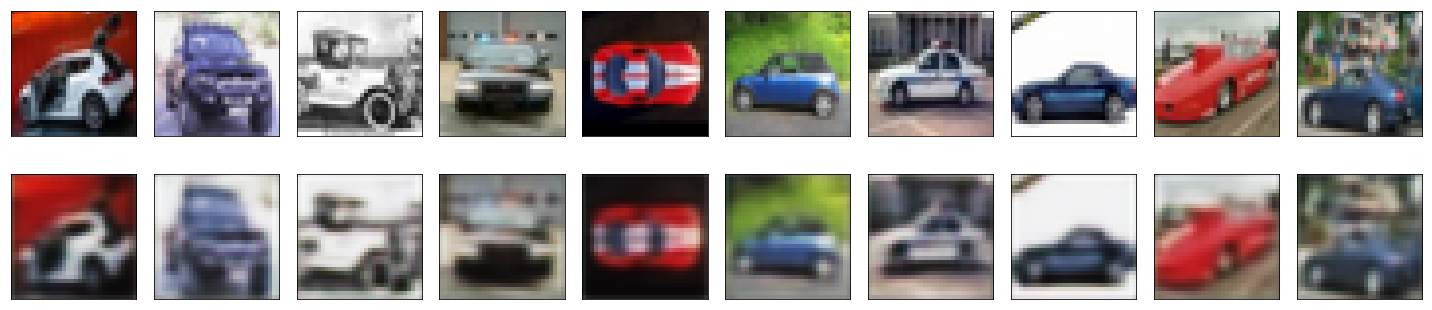

In [18]:
% matplotlib inline
import matplotlib.pyplot as plt

n_imgs = 10
f,axarr = plt.subplots(2, n_imgs,figsize=[20,5])
decoded_imgs = model.predict(x_test_n)

for i in range(n_imgs):
    
    ax = axarr[0,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(x_test_n[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax = axarr[1,i]
    ax.get_yaxis().set_visible(False)
    ax.imshow(decoded_imgs[i,:,:,:])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
            
plt.tight_layout()
plt.show()

#### 5) 오토인토더 전체코드

In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.python.keras.callbacks import TensorBoard, ModelCheckpoint

#########################
# 1) CIFAR10 data load
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train = x_train[np.where(y_train==1)[0],:,:,:]
x_test = x_test[np.where(y_test==1)[0],:,:,:]

# Normalization
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

###########################
# 2) Gaussian Noize 추가
x_train_n = x_train + 0.5 * np.random.normal(loc=0.0, scale=0.4, 
                                             size=x_train.shape)
x_test_n = x_test + 0.5 * np.random.normal(loc=0.0, scale=0.4,
                                           size=x_test.shape)
x_train_n = np.clip(x_train_n, 0., 1.)
x_test_n = np.clip(x_test, 0., 1.)

############################
# 3) Sequential 모델 구성
model = Sequential()

# encoder
model.add(
    Conv2D(32, [3, 3], activation='relu', padding='same'))
model.add(
    MaxPooling2D([2, 2], padding='same'))
model.add(
    Conv2D(32, [3, 3], activation='relu', padding='same'))

# decoder
model.add(
    UpSampling2D([2, 2]))
model.add(
    Conv2D(3, [3, 3], activation='sigmoid', padding='same'))

#############################
# 4) Compilation
model.compile(optimizer='adadelta', loss='binary_crossentropy')

#############################
# 5) Training
# TensorBoard 시각화를 위한 설정
tensorboard = TensorBoard(log_dir='./logs/autoencoder', 
                          histogram_freq=0, write_graph=True, write_images=True)

# 학습된 모델을 저장하기 위한 설정
model_saver = ModelCheckpoint(filepath='./model/autoencoder/autoencoder_model', 
                              verbose=0, period=2)

# Training the network
model.fit(x_train_n, x_train, 
          epochs=10, batch_size=64, 
          shuffle=True, validation_data=(x_test_n, x_test), 
          callbacks=[tensorboard, model_saver])

Train on 5000 samples, validate on 1000 samples
Epoch 1/10
5000/5000 [==============================] - 1s 112us/step - loss: 0.6194 - val_loss: 0.5953
Epoch 2/10
5000/5000 [==============================] - 0s 81us/step - loss: 0.5704 - val_loss: 0.5638
Epoch 3/10
5000/5000 [==============================] - 0s 79us/step - loss: 0.5629 - val_loss: 0.5796
Epoch 4/10
5000/5000 [==============================] - 0s 81us/step - loss: 0.5580 - val_loss: 0.5485
Epoch 5/10
5000/5000 [==============================] - 0s 84us/step - loss: 0.5553 - val_loss: 0.5783
Epoch 6/10
5000/5000 [==============================] - 0s 80us/step - loss: 0.5525 - val_loss: 0.5427
Epoch 7/10
5000/5000 [==============================] - 0s 79us/step - loss: 0.5497 - val_loss: 0.5627
Epoch 8/10
5000/5000 [==============================] - 0s 81us/step - loss: 0.5488 - val_loss: 0.5394
Epoch 9/10
5000/5000 [==============================] - 0s 78us/step - loss: 0.5470 - val_loss: 0.5540
Epoch 10/10
5000/5000 [=

### 7.4.4 정리

이번 포스팅에서는 케라스에 대해 살펴보았다. 케라스는 Sequential 모델과 함수형 API 두 가지 유형이 있는데, 사용하기에는 Sequential 모델이 좀더 편한것 같다. 케라스 홈페이지 https://keras.io/ 에서 더욱 자세한 케라스 사용법 및 튜토리얼을 확인할 수 있다.